Comparaison taille des classes SEGPA en REP/REP+/zone "normale"

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('lv-college.csv', sep = ';')
df.columns
df["autre langue que l'anglais en LV1 en 6ème"]=df['6èmes LV1 espagnol']+df['6èmes LV1 allemand']+'6èmes LV1 autres langues'


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U24')) -> None

In [3]:
segpa_rep = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP', aggfunc = 'sum')

In [4]:
segpa_replus = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP +', aggfunc = 'sum')

In [5]:
display(segpa_rep)
display(segpa_replus)

,Nombre d'élèves total Segpa
REP,
0,347969
1,89144


,Nombre d'élèves total Segpa
REP +,
0,379835
1,57278


In [6]:
rep = segpa_rep.loc[1, "Nombre d'élèves total Segpa"]
replus = segpa_replus.loc[1, "Nombre d'élèves total Segpa"]
clas = segpa_rep.loc[0, "Nombre d'élèves total Segpa"] + segpa_rep.loc[1, "Nombre d'élèves total Segpa"] - (rep+replus)

segpa = pd.DataFrame({"REP" : [rep], "REP +" : [replus], "classique" : [clas]})

In [7]:
segpa

,REP,REP +,classique
0,89144,57278,290691


In [8]:
#sns.histplot(data=segpa, y = "Nombre d'élèves total Segpa")
plt.hist(segpa, y = "Nombre d'élèves total Segpa")

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([ 57278. ,  80619.3, 103960.6, 127301.9, 150643.2, 173984.5,
        197325.8, 220667.1, 244008.4, 267349.7, 290691. ]),
 <a list of 3 BarContainer objects>)

Error in callback <function _draw_all_if_interactive at 0x0000023C8AD84A40> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: "Nombre d'élèves total Segpa"

ConversionError: Failed to convert value(s) to axis units: "Nombre d'élèves total Segpa"

<Figure size 640x480 with 1 Axes>

In [4]:
#création nouvelle colonne Christelle pour pouvoir travailler sur la taille du collège

df['taille']=pd.cut(df["Nombre d'élèves total"], bins=[0,100,300,500,10000,100000], labels=['très petit','petit','moyen','grand','très grand'])
df.head(5)

df.pivot_table(index="taille",columns="REP",values="6èmes LV1 espagnol")

C:\Users\chris\AppData\Local\Temp\ipykernel_52536\2757639571.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="taille",columns="REP",values="6èmes LV1 espagnol")


REP,0,1
taille,,
très petit,0.043668,0.000000
petit,0.369434,0.274699
moyen,0.542037,0.504184
grand,1.148783,1.483853


In [10]:
#création colonne Christelle pourcentage èlèves en ULIS, en SEGPA

df["pourcentage élèves en SEGPA"]=(df["Nombre d'élèves total Segpa"]/df["Nombre d'élèves total"])*100
df["pourcentage élèves en ULIS"]=df["Nombre d'élèves total ULIS"]/df["Nombre d'élèves total"]*100
df.head(4)

maxi=df["pourcentage élèves en SEGPA"].idxmax()
df.loc[maxi,["Nombre d'élèves total","Nombre d'élèves total Segpa"]]



Nombre d'élèves total          43
Nombre d'élèves total Segpa    43
Name: 122, dtype: object

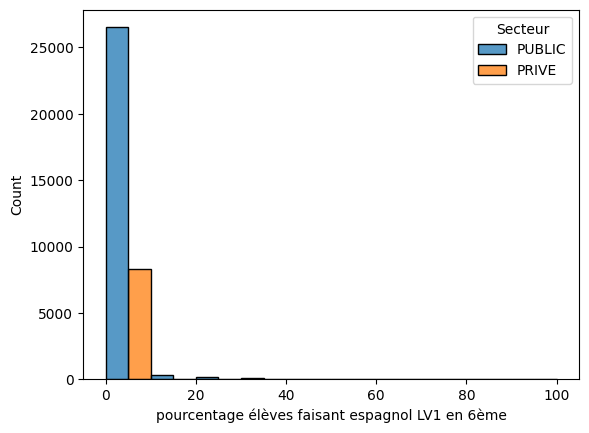

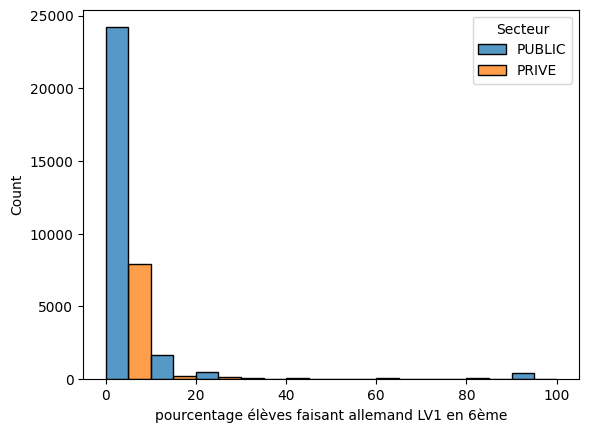

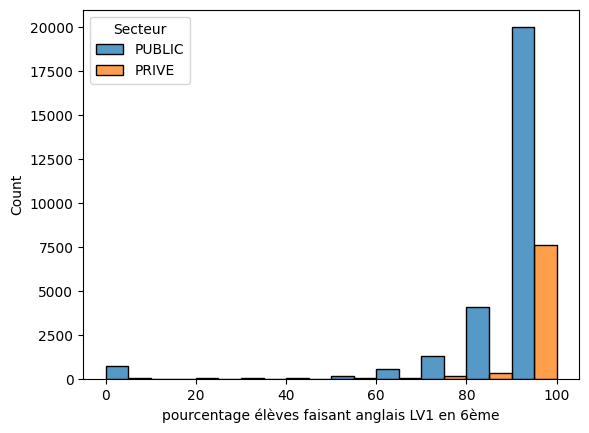

In [34]:
# création par Christelle colonne correspondant au pourcentage d'élèves faisant allemand LV1

df["pourcentage élèves faisant allemand LV1 en 6ème"]=df["6èmes LV1 allemand"]/df["6èmes total"]*100
df["pourcentage élèves faisant espagnol LV1 en 6ème"]=df["6èmes LV1 espagnol"]/df["6èmes total"]*100
df["pourcentage élèves faisant anglais LV1 en 6ème"]=df["6èmes LV1 anglais"]/df["6èmes total"]*100


sns.histplot(data=df,x="pourcentage élèves faisant espagnol LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant allemand LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant anglais LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge",common_norm=True)
plt.show()

Que l'on soit dans le public ou dans le privé, il y a plus d'établissement avec une majorité d'élèves faisant anglais LV1 plutôt qu'une autre langue en LV1

In [13]:
#création d'un fichier csv avec les nouvelles colonnes ajoutées 
df.to_csv("données_col.csv",index=False)
df.head(4)

,num_ligne,Rentrée scolaire,Code région académique,Région académique,Code académie,Académie,Code département,Département,Code postal,Commune,...,3èmes LV2 anglais,3èmes LV2 espagnol,3èmes LV2 italien,3èmes LV2 autres langues,taille,pourcentage élèves en SEGPA,pourcentage élèves en ULIS,pourcentage élèves faisant allemand LV1 en 6ème,pourcentage élèves faisant espagnol LV1 en 6ème,pourcentage élèves faisant anglais LV1 en 6ème
0,30005,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78400,CHATOU,...,0,102,1,0,grand,7.979626,2.037351,0.0,0.0,92.424242
1,30009,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78310,COIGNIERES,...,0,84,0,0,moyen,0.000000,2.267574,0.0,0.0,98.198198
2,30011,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78700,CONFLANS-SAINTE-HONORINE,...,0,156,17,0,grand,6.651109,1.166861,0.0,0.0,92.957746
3,30016,2022,10,ILE-DE-FRANCE,25,VERSAILLES,78,YVELINES,78990,ELANCOURT,...,0,117,0,13,grand,0.000000,2.197802,0.0,0.0,96.363636


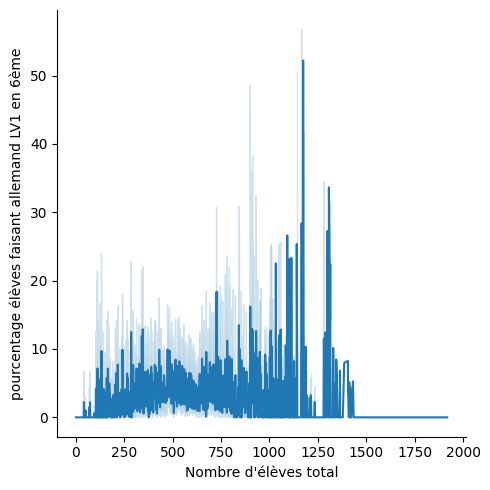

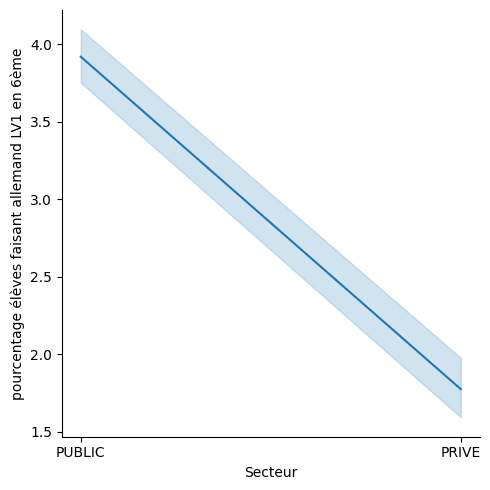

In [14]:
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Nombre d'élèves total",kind="line")
plt.show()


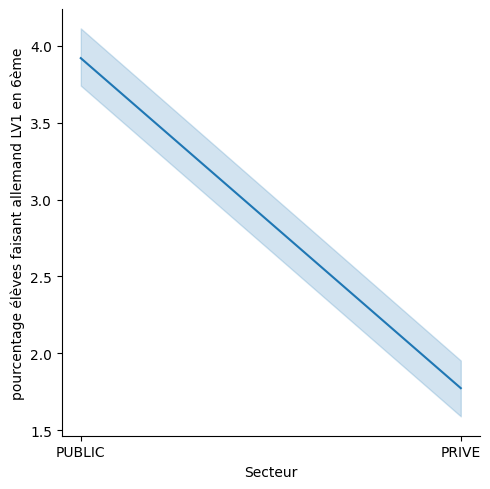

In [15]:
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Secteur",kind="line")
plt.show()



On peut voir qu'il ne semble pas avoir de corrélation entre la taille d'un collège et le nombre d'élèves faisant allemand LV1 mais que le fait que le collège soit public ou privé a bien une influence

Secteur
PRIVE      22539
PUBLIC    133292
Name: 6èmes LV1 allemand, dtype: int64

Secteur
PRIVE      21465
PUBLIC    111113
Name: 5èmes LV1 allemand, dtype: int64

Secteur
PRIVE      22444
PUBLIC    108337
Name: 4èmes LV1 allemand, dtype: int64

Secteur
PRIVE      22719
PUBLIC    101080
Name: 3èmes LV1 allemand, dtype: int64

Secteur
PRIVE      6980
PUBLIC    21051
Name: 6èmes LV1 espagnol, dtype: int64

Secteur
PRIVE      6509
PUBLIC    19753
Name: 5èmes LV1 espagnol, dtype: int64

Secteur
PRIVE      6142
PUBLIC    17656
Name: 4èmes LV1 espagnol, dtype: int64

Secteur
PRIVE      5772
PUBLIC    16165
Name: 3èmes LV1 espagnol, dtype: int64

Secteur
PRIVE      885747
PUBLIC    3066043
Name: 6èmes LV1 anglais, dtype: int64

Secteur
PRIVE      883583
PUBLIC    3077735
Name: 5èmes LV1 anglais, dtype: int64

Secteur
PRIVE      866905
PUBLIC    3078061
Name: 4èmes LV1 anglais, dtype: int64

Secteur
PRIVE      867238
PUBLIC    3109186
Name: 3èmes LV1 anglais, dtype: int64

Secteur
PRIVE       878
PUBLIC    16093
Name: 6èmes LV1 autres langues, dtype: int64

Secteur
PRIVE       771
PUBLIC    14325
Name: 5èmes LV1 autres langues, dtype: int64

Secteur
PRIVE       737
PUBLIC    13589
Name: 4èmes LV1 autres langues, dtype: int64

Secteur
PRIVE       695
PUBLIC    12789
Name: 3èmes LV1 autres langues, dtype: int64

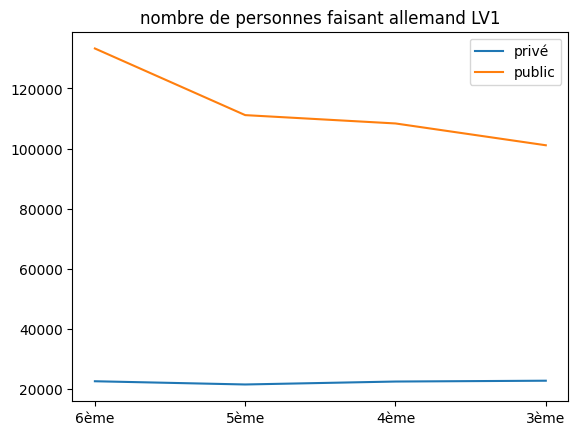

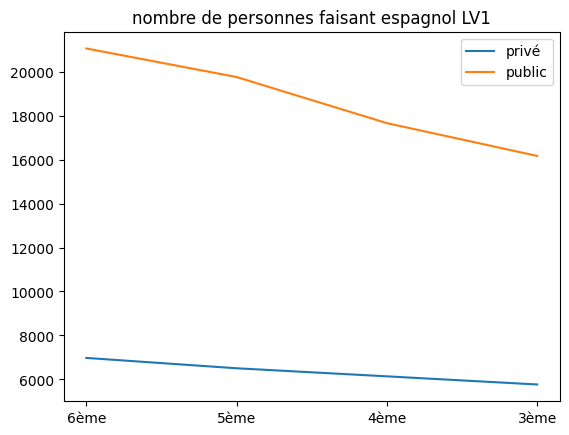

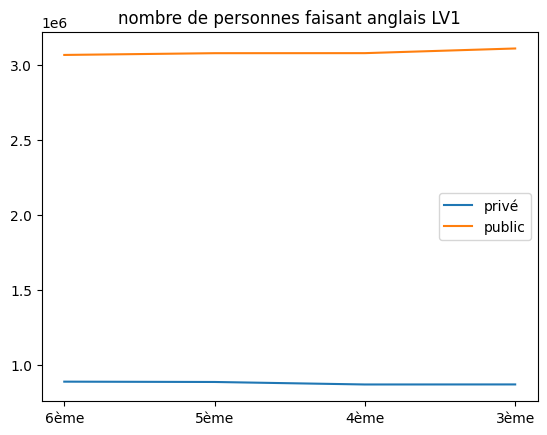

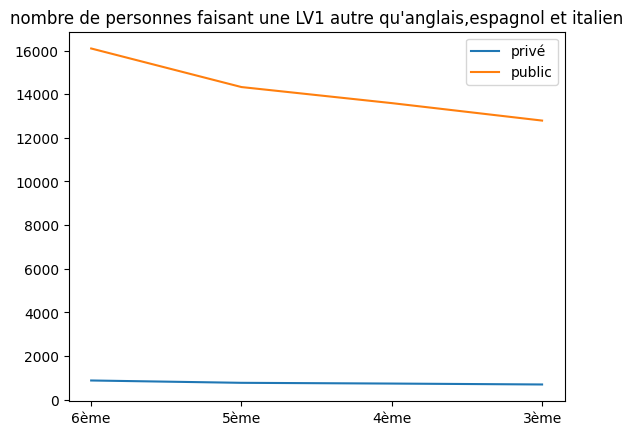

In [48]:
gb=df.groupby(by="Secteur")
display(gb["6èmes LV1 allemand"].sum())
display(gb['5èmes LV1 allemand'].sum())
display(gb["4èmes LV1 allemand"].sum())
display(gb["3èmes LV1 allemand"].sum())

display(gb["6èmes LV1 espagnol"].sum())
display(gb['5èmes LV1 espagnol'].sum())
display(gb["4èmes LV1 espagnol"].sum())
display(gb["3èmes LV1 espagnol"].sum())

display(gb["6èmes LV1 anglais"].sum())
display(gb['5èmes LV1 anglais'].sum())
display(gb["4èmes LV1 anglais"].sum())
display(gb["3èmes LV1 anglais"].sum())

display(gb["6èmes LV1 autres langues"].sum())
display(gb["5èmes LV1 autres langues"].sum())
display(gb["4èmes LV1 autres langues"].sum())
display(gb["3èmes LV1 autres langues"].sum())

X=["6ème","5ème","4ème","3ème"]
Y=[22539, 21465,22444, 22719]
Z=[133292,111113,108337,101080]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant allemand LV1")
plt.legend()
plt.show()


X=["6ème","5ème","4ème","3ème"]
Y=[ 6980, 6509,6142, 5772]
Z=[21051,19753,17656,16165]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant espagnol LV1")
plt.legend()
plt.show()

X=["6ème","5ème","4ème","3ème"]
Y=[ 885747, 883583,866905,867238]
Z=[3066043,3077735,3078061, 3109186]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant anglais LV1")
plt.legend()
plt.show()

X=["6ème","5ème","4ème","3ème"]
Y=[ 878, 771, 737,695]
Z=[16093, 14325,13589, 12789]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant une LV1 autre qu'anglais,espagnol et italien")
plt.legend()
plt.show()


Dans les 2 cas, on observe une diminution du nombre d'élèves faisant une LV1 autre que l'anglais ce qui peut s'expliquer par le fait que des élèves eput-être plus faibles en langue préfèrent se concentrer sur l'anglais. Ce basculement vers l'anglais se traduit bien par une augmentation du nombre d'élèves faisant anglais LV1
Mais n peut voir que les élèves abandonnent beaucoup plus une langue dans le public que dans le privé ce qui peut s'expliquer peut-être par le fait que le privé permet moins à leurs élèves de changer de LV1 et que les aprents vont peut-être dans le même sens.

np.int64(200833)

np.int64(173936)

np.int64(168905)

np.int64(159220)

np.int64(28031)

np.int64(26262)

np.int64(23798)

np.int64(21937)

np.int64(155831)

np.int64(132578)

np.int64(130781)

np.int64(123799)

np.int64(3951790)

np.int64(3961318)

np.int64(3944966)

np.int64(3976424)

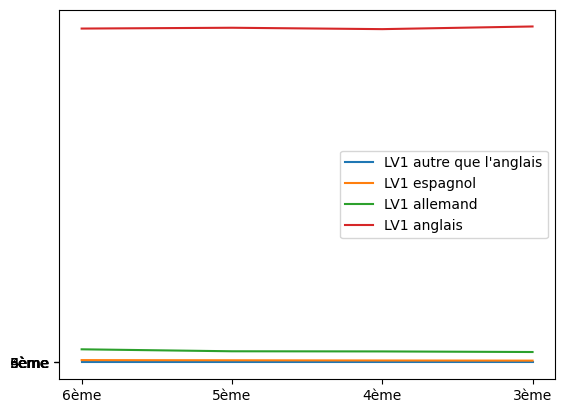

In [25]:
df["autre langue que l'anglais en LV1 en 6ème"]=df["6èmes LV1 espagnol"]+df['6èmes LV1 allemand']+df['6èmes LV1 autres langues']
df["autre langue que l'anglais en LV1 en 5ème"]=df["5èmes LV1 espagnol"]+df['5èmes LV1 allemand']+df['5èmes LV1 autres langues']
df["autre langue que l'anglais en LV1 en 4ème"]=df["4èmes LV1 espagnol"]+df['4èmes LV1 allemand']+df['4èmes LV1 autres langues']
df["autre langue que l'anglais en LV1 en 3ème"]=df["3èmes LV1 espagnol"]+df['3èmes LV1 allemand']+df['3èmes LV1 autres langues']
display(df["autre langue que l'anglais en LV1 en 6ème"].sum())
display(df["autre langue que l'anglais en LV1 en 5ème"].sum())
display(df["autre langue que l'anglais en LV1 en 4ème"].sum())
display(df["autre langue que l'anglais en LV1 en 3ème"].sum())

display(df["6èmes LV1 espagnol"].sum())
display(df["5èmes LV1 espagnol"].sum())
display(df["4èmes LV1 espagnol"].sum())
display(df["3èmes LV1 espagnol"].sum())

display(df["6èmes LV1 allemand"].sum())
display(df["5èmes LV1 allemand"].sum())
display(df["4èmes LV1 allemand"].sum())
display(df["3èmes LV1 allemand"].sum())

display(df["6èmes LV1 anglais"].sum())
display(df["5èmes LV1 anglais"].sum())
display(df["4èmes LV1 anglais"].sum())
display(df["3èmes LV1 anglais"].sum())

A=["6ème","5ème","4ème","3ème"]
Y=[ 200833,173936,168905,159220]
plt.plot(X,A, label="LV1 autre que l'anglais")
plt.legend()

B=[ 28031,26262,23798,21937]
plt.plot(X,B, label="LV1 espagnol")
plt.legend()


C=[155831,132578,130781,123799]
plt.plot(X,C, label="LV1 allemand")
plt.legend()

D=[3951790,3961318,3944966,3976424]
plt.plot(X,D, label="LV1 anglais")
plt.legend()
plt.show()

On peut voir que l'on a une légère diminution du nombre d'élèves qui font allemand au profit du nombre d'élèves qui font anglais ce qui peut s'expliquer par le fait que certains élèves décident d'arrêter l'allemand car jugé trop difficile.

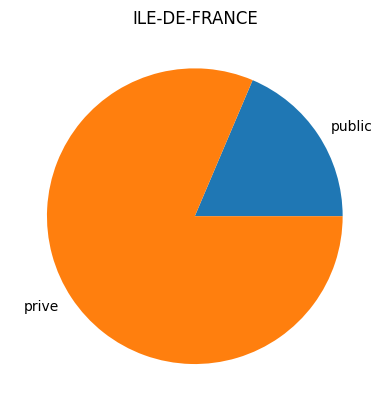

C:\Users\chris\AppData\Local\Temp\ipykernel_52536\3919461588.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


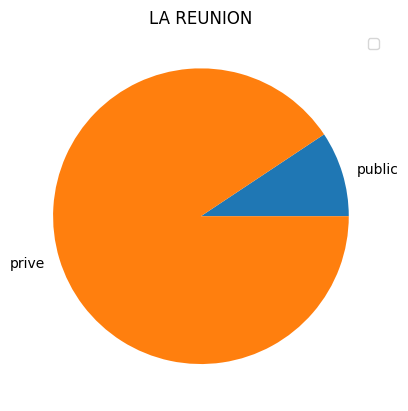

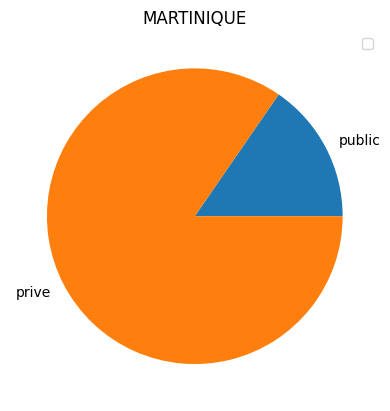

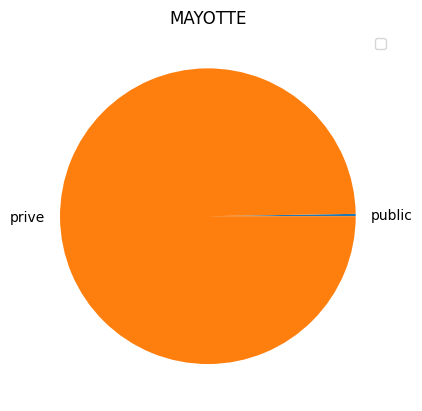

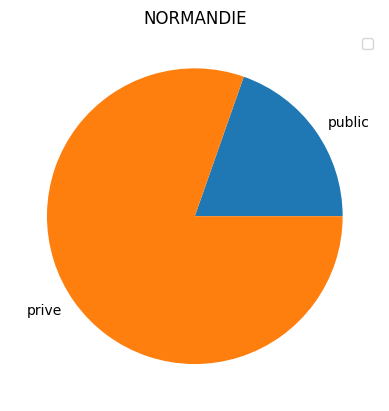

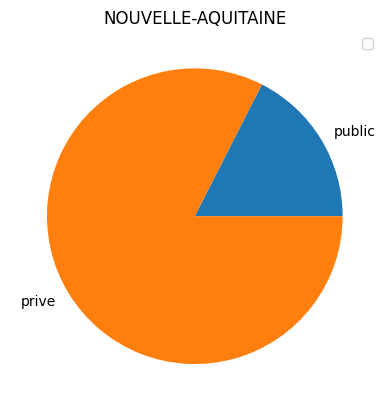

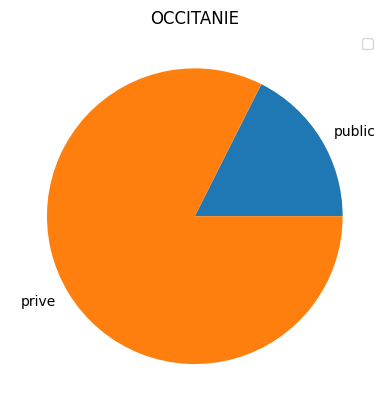

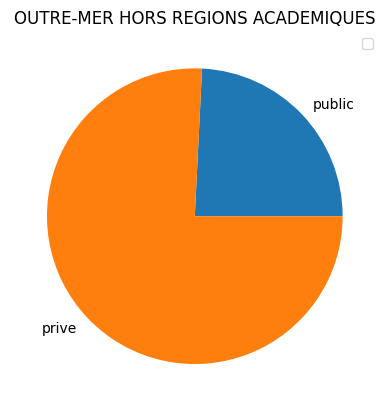

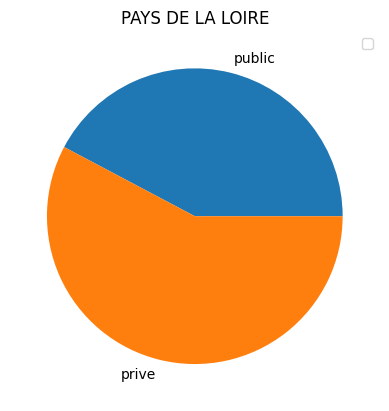

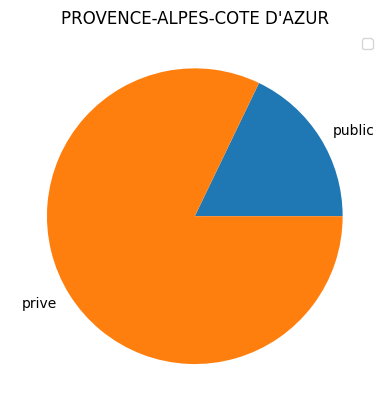

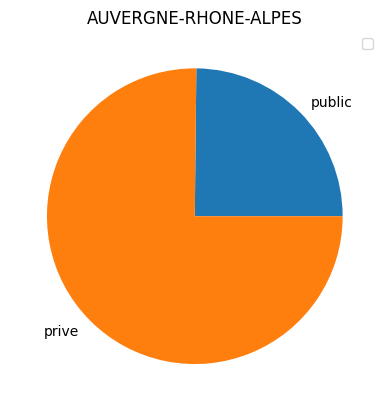

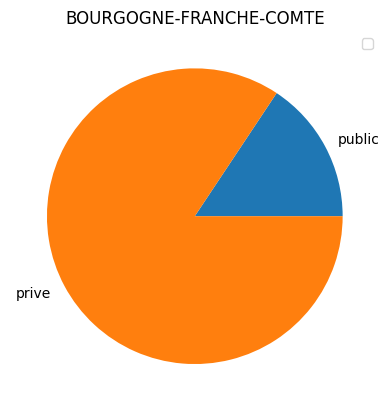

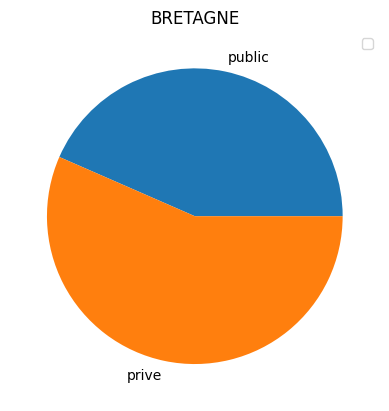

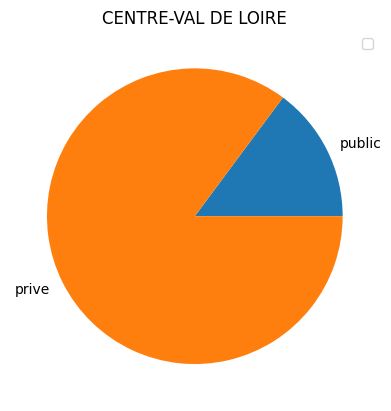

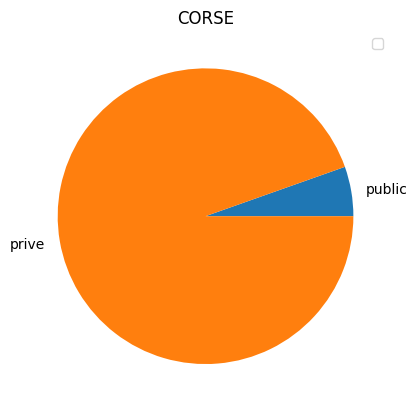

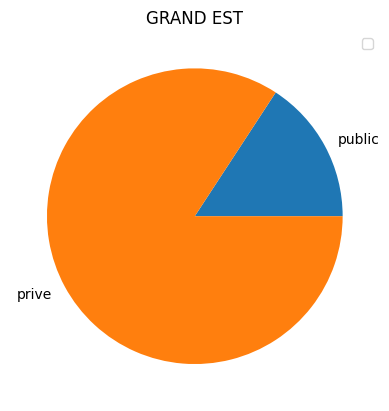

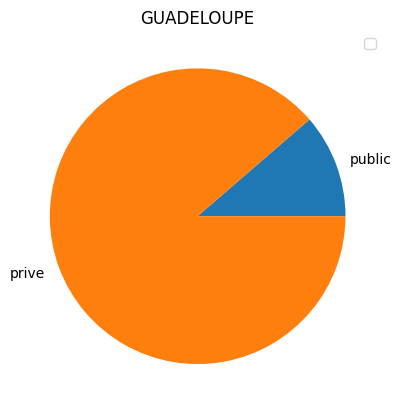

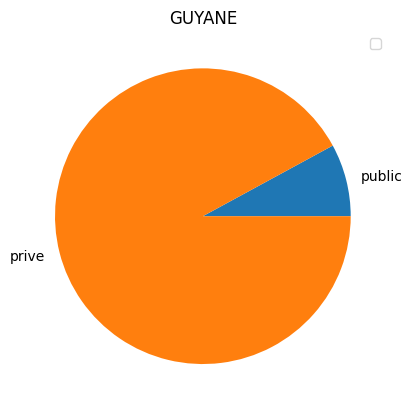

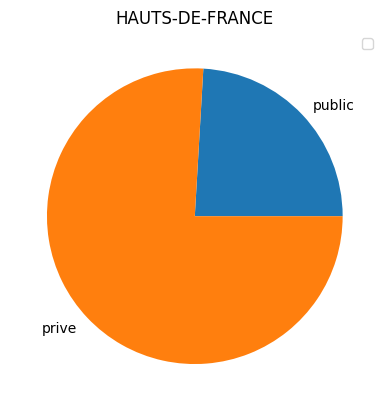

{'ILE-DE-FRANCE': 0.18602996516926643, 'LA REUNION': 0.09336091895152188, 'MARTINIQUE': 0.15398673641357877, 'MAYOTTE': 0.002549407246174225, 'NORMANDIE': 0.1962498011751153, 'NOUVELLE-AQUITAINE': 0.17505774899585702, 'OCCITANIE': 0.17569385623129483, 'OUTRE-MER HORS REGIONS ACADEMIQUES': 0.2421744893450702, 'PAYS DE LA LOIRE': 0.4225379009431368, "PROVENCE-ALPES-COTE D'AZUR": 0.17851462908603247, 'AUVERGNE-RHONE-ALPES': 0.24832798085040406, 'BOURGOGNE-FRANCHE-COMTE': 0.15660783039151957, 'BRETAGNE': 0.4344050296524466, 'CENTRE-VAL DE LOIRE': 0.14832816863388307, 'CORSE': 0.054168832133046255, 'GRAND EST': 0.1578358505940988, 'GUADELOUPE': 0.11349533575152652, 'GUYANE': 0.0792628034142438, 'HAUTS-DE-FRANCE': 0.24078970161124114}
les régions avec le plus gros pourcentage d'élèves scolarisés dans le privé sont [('BRETAGNE', 0.4344050296524466), ('PAYS DE LA LOIRE', 0.4225379009431368), ('AUVERGNE-RHONE-ALPES', 0.24832798085040406)]


NameError: name 'prinnt' is not defined

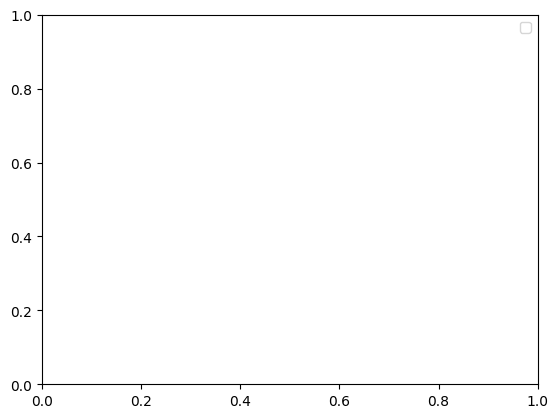

In [49]:
df.columns
gb=df.groupby(by=['Secteur','Région académique'])
dico=gb["Nombre d'élèves total"].sum().to_dict()

region=df["Région académique"].unique()
dico_data={}


for reg in region:
    data=[dico[('PRIVE',f"{reg}")],dico[('PUBLIC',f"{reg}")]]
    perc=dico[('PRIVE',f"{reg}")]/(dico[('PRIVE',f"{reg}")]+dico[('PUBLIC',f"{reg}")])
    dico_data[f"{reg}"]=perc
    plt.pie(data,labels=['public','prive'])
    plt.title(f"{reg}")
    plt.show()
    plt.legend()


print(dico_data)
regions_plus = sorted(dico_data.items(), key=lambda x: x[1], reverse=True)[:3]
regions_moins=sorted(dico_data.items(), key=lambda x: x[1])[:3]
print("les régions avec le plus gros pourcentage d'élèves scolarisés dans le privé sont",regions_plus)
print("les régions avec le moins d'élèves scolarisés dans le privé sont",regions_moins)



On peut voir que les régions académiques où il y a une plus grande proportion d'élèves qui sont dans le privé sont les pays de Loire et la Bretagne qui sont des régions qui sont historiquement plus catholiques, la vendée très catholique située dans les pays de Loire s'est par exemple opposée en 1789 à la révolution Française. On retrouve également l'Auvergen-Rhône-Alpes qui doit être aussi une région plus traditonnelle
A l'inverse,les régions avec  le moins de personnes dans le privé sont Mayotte, la Corse et la Guyanne qui ont des régions plus pauvres ce qui pourrait expliquer le faible nombre d'enfants scolarisés dans le privé.



df['taille']=pd.cut(df["Nombre d'élèves total"], bins=[0,50,51,200,500,100000], labels=['très petit','petit','moyen','grand','très grand'])
pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()


df.columns
pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()
lab=pub['taille'].unique().tolist()[:5]
print(lab,data)
plt.pie(data,labels=lab)
plt.title('public')
plt.show()


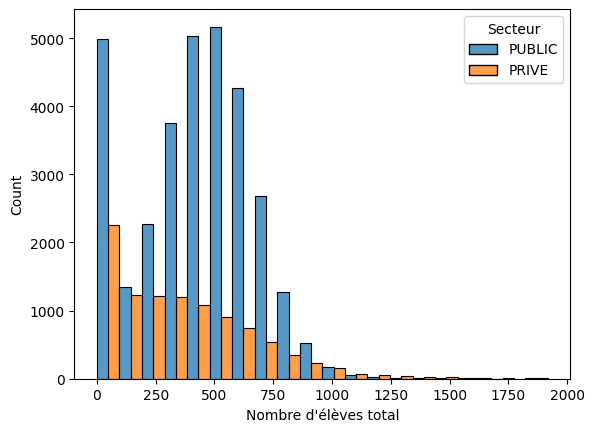

In [110]:
sns.histplot(data=df,x="Nombre d'élèves total", bins=20, multiple="dodge",hue='Secteur')
plt.show()

In [1]:
df['taille']=pd.cut(df["Nombre d'élèves total"], bins=[0,250,500,750,1000,100000], labels=['très petit','petit','moyen','grand','très grand'])

pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()


df.columns
pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
nombre=[]
taille=[]
dico=gb1["Nombre d'élèves total"].sum().to_dict()
for cle,valeur in dico.items():
    taille.append(cle)
    nombre.append(valeur)
    
print(dico)


plt.pie(nombre,labels=taille)
plt.title('public')
plt.show()


pri=df[df['Secteur']=="PRIVE"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()


df.columns
pub=df[df['Secteur']=="PRIVE"]
gb1=pub.groupby(by='taille')
nombre=[]
taille=[]
dico=gb1["Nombre d'élèves total"].sum().to_dict()
for cle,valeur in dico.items():
    taille.append(cle)
    nombre.append(valeur)
    
print(dico)


plt.pie(nombre,labels=taille)
plt.title('privé')
plt.show()

print(" très petit correspond à un nombre d'élèves compris entre 0 et 250")
print(" petit correspond à un nombre d'élèves compris entre 250 et 500")
print(" moyen correspond à un nombre d'élèves compris entre 500 et 750")
print(" grand correspond à un nombre d'élèves compris entre 750 et 1000")
print(" très grand correspond à un nombre d'élèves supérieur à 1000")

NameError: name 'pd' is not defined

In [ ]:
La réparition de la taille des lycées publiques et privés n'est pas la même, on retrouve plus de lycées privés dans les extrèmes (petits comme grands). Petits car les lycées ne recrutent pas forcément assez d'élèves.